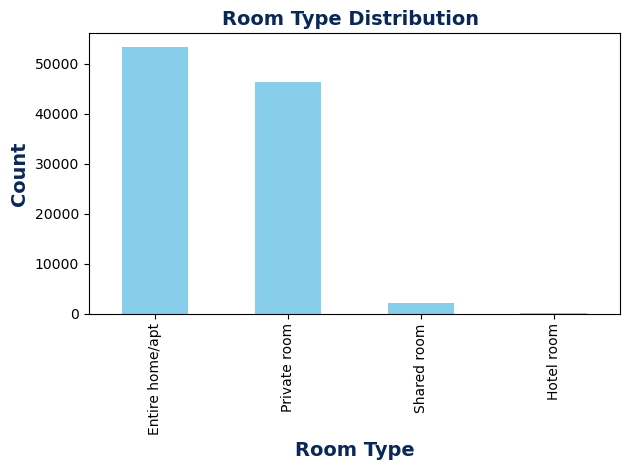

In [53]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv('airbnb_data.csv',low_memory=False)

# Step 3: Preview first 5 rows
df.head()

# print(df.shape)
# print(df.columns)
# print(df.dtypes)

#1. Convert prices and fees
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)
df.head()

#2. Convert date column
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df.head(10)

# 3.Convert floats to integers
df['minimum nights'] = df['minimum nights'].fillna(0).astype(int)
df['number of reviews'] = df['number of reviews'].fillna(0).astype(int)
df['availability 365'] = df['availability 365'].fillna(0).astype(int)
df.head(10)

# 4 Check for missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)
missing.head()

df.dropna(subset=['lat', 'long', 'price', 'service fee'], inplace=True)
df.head()

# 5.Drop irrelevant columns
df['host name'] = df['host name'].fillna('Unknown')
df.head(10)

# 6.Exploratory Data Analysis (EDA)
df['neighbourhood group'].value_counts()
df.head()

# 7.Bar plot of room types
df['room type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Room Type Distribution ', color='#0a2857', fontweight='bold', fontsize=14)
plt.xlabel('Room Type',color='#0a2857', fontweight='bold', fontsize=14)
plt.ylabel('Count',color='#0a2857', fontweight='bold',fontsize=14)
plt.tight_layout()
plt.show()

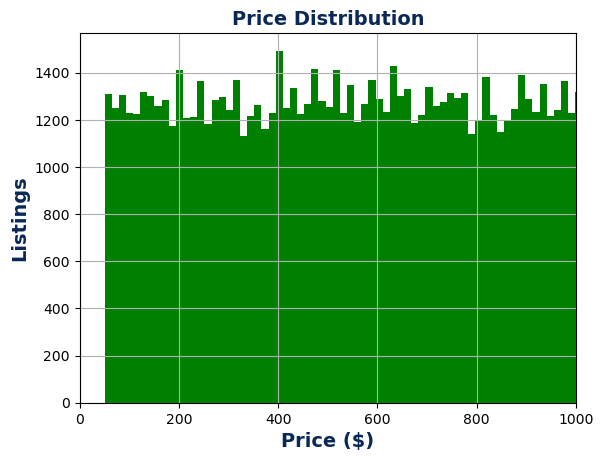

In [59]:
# 8. Price distribution
df['price'].hist(bins=80, color='green')
plt.title('Price Distribution', color='#0a2857', fontweight='bold', fontsize=14)
plt.xlabel('Price ($)', color='#0a2857', fontweight='bold', fontsize=14)
plt.ylabel('Listings', color='#0a2857', fontweight='bold', fontsize=14)
plt.xlim(0, 1000) # zoom in to remove outliers

plt.show()

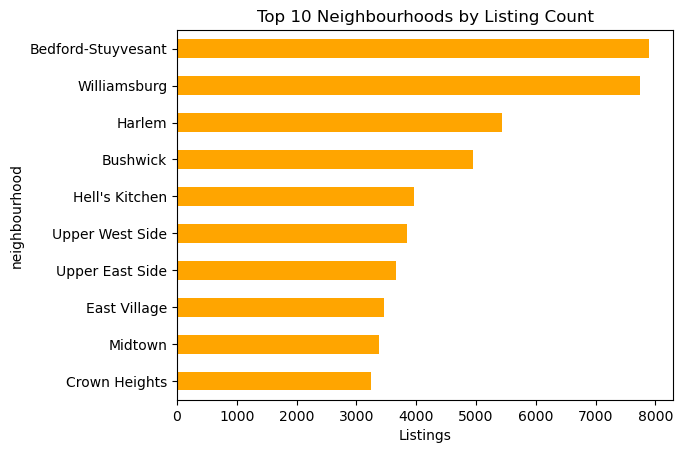

In [60]:
# 9 Listings by neighbourhood
top_neigh = df['neighbourhood'].value_counts().head(10)
top_neigh.plot(kind='barh', color='orange')
plt.title('Top 10 Neighbourhoods by Listing Count')
plt.xlabel('Listings')
plt.gca().invert_yaxis()
plt.show()



In [61]:
df.groupby('room type')['price'].mean().sort_values(ascending=False)


room type
Hotel room         663.561404
Shared room        633.967494
Private room       624.978866
Entire home/apt    624.937869
Name: price, dtype: float64

In [62]:
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)


neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                792.260870
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64

In [63]:
df[['NAME', 'number of reviews']].sort_values('number of reviews', ascending=False).head(10)


,NAME,number of reviews
52488,Sonder Battery Park | Studio Apartment,1024
62244,City King,1010
49799,Amazing Micro Unit W/ communal rooftop and kit...,966
53078,Enjoy great views of the City!,884
49653,Come catch a Broadway Show & stay in Times Square,849
49827,Hudson River View King Bed at Higher Floor,797
49605,Beautiful Standard Full Room at The Ridge,776
57532,King Room City,738
50780,THE PRIVACY DEN ~ 5 MINUTES TO JFK,698
54308,Entire New Apartment in Park Slope / Gowanus,679
